In [ ]:
# Bitcoin Prices from 2012-2019, attempt to predict using Multivariate Linear Regression:

In [1]:
# Import the libraries we currently need (will import sklearn when requiried):

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prices = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [3]:
prices.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prices = prices[prices['Weighted_Price'] > 0]
prices.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


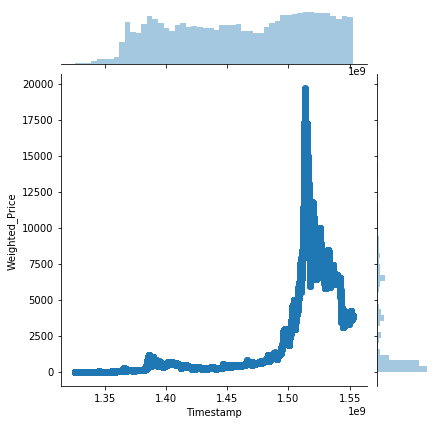

In [5]:
# Visualize
sns.jointplot(x='Timestamp', y='Weighted_Price', data=prices)

In [6]:
# Get our training and testing data:
X = prices[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)']]
y = prices['Weighted_Price']

In [7]:
X.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160


In [8]:
y.head()

0       4.390000
478     4.390000
547     4.526411
548     4.580000
1224    4.580000
Name: Weighted_Price, dtype: float64

In [9]:
# Begin to train data:
from sklearn.model_selection import train_test_split

In [10]:
# Create our train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

In [14]:
# Create Linear Regression instance:
lm = LinearRegression()

In [16]:
# Train/Fit model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
coefficients = lm.coef_
coefficients

array([-1.28768018e-09,  5.39873779e-02,  3.88915126e-01,  4.25706028e-01,
        1.31438730e-01, -2.71017995e-04, -5.09289588e-07])

In [23]:
predictions = lm.predict(X_test)

In [27]:
# Use 'Root Mean Squared Error' evaluation metric to determine accuracy of model:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
RMSE

2.5116165725792445

In [29]:
metrics.explained_variance_score(y_test, predictions)

0.9999994924946195

In [ ]:
# Successfuly produced a Linear Regression ML algorithm with a high variance score and low Root Mean Squared Error on
# previously unseen data.